# Overview 

###  Insights on the Affordable Housing Crisis in Florida

As part of the DataKind challenge, I conducted an in-depth analysis of the affordable housing crisis in the State of Florida. This research aimed to uncover insights that could help address the pressing issues surrounding housing accessibility and affordability. 

To facilitate a comprehensive examination of this complex problem, I separated the data into four distinct datasets, each focusing on specific features and inquiries:

**Housing**
   - This dataset explores the current state of affordable housing, including availability, pricing trends, and housing quality across various regions.

**Banking**
   - Here, I analyze financial factors influencing housing affordability, such as mortgage rates, lending practices, and access to financial resources for low-income families.

**Environment**
   - This dataset assesses environmental conditions that may impact housing choices, including risk factors like flooding, pollution, and proximity to essential services.

**Economic Profile**
   - This section examines the economic conditions affecting residents, including income levels, employment rates, and other socioeconomic factors that contribute to housing challenges.

By examining these factors individually, we can gain a clearer understanding of specific demographics that face significant barriers to housing. This detailed analysis helps identify populations at risk and highlights areas where the state may need to increase investments to improve housing stability. Additionally, it sheds light on how certain conditions can make it difficult for residents to afford housing in areas that may already be deemed risky.

Through this approach, the aim is to provide actionable insights that can guide decisions and foster a more equitable housing landscape in Florida.

In [1]:
#import statements
import pandas as pd
import numpy as np

#visualizations
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

### Loading and Preprocessing Florida Data   

In [3]:
#importing data from a download from the datakind pipeline https://eodatascape.datakind.org/explore-data
df = pd.read_csv('data_housing.csv')
print(df.shape)
df.head(5).T

(5160, 74)


,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
...,...,...,...,...,...
pop_pct_75plus_moe,0.9,1.8,2.5,0.6,1.8
pop_pct_male_75plus_est,0.0,1.1,4.5,0.0,2.8
pop_pct_male_75plus_moe,2.6,1.6,2.9,1.5,1.9
pop_pct_fem_75plus_est,0.0,4.0,6.3,0.0,6.1


In [5]:
#df.columns.to_list()

In [7]:
df1 = pd.read_csv('data_banking.csv')
print(df1.shape)
df1.head(5).T

(5160, 23)


,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
county_fips_code,1,1,1,1,1
total_cdfi_lending,6543.333333,44290.0,74871.0,0.0,47043.683979
med_mortgage_loan,205000.0,165000.0,135000.0,225000.0,305000.0
med_property_value,325000.0,225000.0,185000.0,265000.0,405000.0
med_sba_504_loan,NaN,351500.0,140000.0,NaN,149000.0


In [9]:
df2 = pd.read_csv('data_environmental.csv')
print(df2.shape)
df2.head(5).T

(5160, 104)


,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
...,...,...,...,...,...
pop_pct_black,9.5,30.7,62.8,9.4,5.2
pop_pct_american_indian,0.0,0.0,0.1,0.1,0.0
pop_pct_asian,4.1,2.1,0.0,8.8,4.2
pop_pct_native_hawaiian,0.0,0.0,0.0,0.0,0.0


In [11]:
df3 = pd.read_csv('data_EconomicP.csv')
print(df3.shape)
df3.head(35).T

(5160, 163)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
geoid,12001000202,12001000301,12001000700,12001000902,12001001000,12001001515,12001001517,12001001702,12001001813,12001001817,...,12005002605,12005002609,12007000400,12009060105,12009060301,12009060400,12009061001,12009061002,12009061100,12009062108
geoid_year,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida,...,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,...,Bay County,Bay County,Bradford County,Brevard County,Brevard County,Brevard County,Brevard County,Brevard County,Brevard County,Brevard County
state_fips_code,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pop_pct_asian,4.1,2.1,0.0,8.8,4.2,9.9,16.3,1.1,6.8,1.2,...,0.4,1.7,1.6,0.7,0.0,0.0,1.1,0.2,0.0,0.6
pop_pct_american_indian,0.0,0.0,0.1,0.1,0.0,0.3,0.3,0.0,0.0,0.1,...,0.6,0.2,0.0,0.0,0.0,0.1,0.5,0.0,0.0,0.0
pop_pct_black,9.5,30.7,62.8,9.4,5.2,19.5,20.5,5.8,12.5,16.4,...,7.6,5.8,19.4,17.1,25.8,8.8,21.6,3.4,12.5,7.8
pop_pct_white,76.3,57.8,31.8,73.5,79.2,58.2,42.1,80.5,75.9,72.9,...,87.2,77.4,71.0,82.2,67.8,82.1,58.8,83.9,79.6,81.4


In [13]:
# checking for any missing data
df.columns[df.isnull().any()]
df1.columns[df1.isnull().any()]
df2.columns[df2.isnull().any()]
df3.columns[df3.isnull().any()]

Index([], dtype='object')

In [17]:
# List of DataFrames
dataframes = [df, df1, df2, df3]

# Remove NaN values from each DataFrame
for i in range(len(dataframes)):
    
    # Removes all the NaN values 
    dataframes[i] = dataframes[i].dropna()
    
    # Removes the word "County" from the county name
    dataframes[i]['county'] = dataframes[i]['county'].str.replace('County', '', regex=False).str.strip()

    # Replace specified values with 0 only for the first DataFrame
    if i == 0:
        replacements = {
            -666666666: 0,
            -222222222: 0,
            -666666666.0: 0.0,
        }

        for col in dataframes[i].columns:
            if col in ['housecost_owner_est', 'housecost_owner_moe', 'housecost_rent_moe', 
                        'housecost_rent_est', 'pop_pct_2plus_races', 'pop_pct_asian', 
                        'pop_pct_white', 'pop_pct_american_indian', 'pop_pct_other_race', 
                        'pop_pct_native_hawaiian', 'pop_pct_black']:
                dataframes[i][col] = dataframes[i][col].replace(replacements)

        # Drop rows with zero values in the specified columns
        for col in ['housecost_owner_est', 'housecost_owner_moe', 'housecost_rent_moe', 
                    'housecost_rent_est', 'pop_pct_2plus_races', 'pop_pct_asian', 
                    'pop_pct_white', 'pop_pct_american_indian', 'pop_pct_other_race', 
                    'pop_pct_native_hawaiian', 'pop_pct_black']:
            dataframes[i] = dataframes[i][dataframes[i][col] != 0]

# Assign the cleaned DataFrames back to their original names if needed
df, df1, df2, df3 = dataframes

In [19]:
print('The total rows in our table is: ', df.shape[0])
print('The total columns in our table is: ', df.shape[1])
print('The total COUNTIES in dataset: ', df['county'].nunique())

The total rows in our table is:  119
The total columns in our table is:  74
The total COUNTIES in dataset:  39


In [21]:
print('The total rows in our table is: ', df1.shape[0])
print('The total columns in our table is: ', df1.shape[1])
print('The total COUNTIES in dataset: ', df1['county'].nunique())

The total rows in our table is:  2270
The total columns in our table is:  23
The total COUNTIES in dataset:  58


In [23]:
print('The total rows in our table is: ', df2.shape[0])
print('The total columns in our table is: ', df2.shape[1])
print('The total COUNTIES in dataset: ', df2['county'].nunique())

The total rows in our table is:  4342
The total columns in our table is:  104
The total COUNTIES in dataset:  63


In [25]:
print('The total rows in our table is: ', df3.shape[0])
print('The total columns in our table is: ', df3.shape[1])
print('The total COUNTIES in dataset: ', df3['county'].nunique())

The total rows in our table is:  5160
The total columns in our table is:  163
The total COUNTIES in dataset:  67


### Managing the entire dataset

In [29]:
# contrsucting the full dataset that will later be use for Geopandas too.
subset = df.merge(df1,  on = ['geoid','county'] , how = 'inner').merge(df2, on=['geoid','county'], how = 'inner')#.merge(df3, on = ['geoid','county'] , how = 'left')
# print(subset.shape)

# removes the duplicated columns resulting from the merging of the datasets 
columns_to_remove =  [ 'pop_pct_native_hawaiian_x',	'pop_pct_native_hawaiian_y', 'geoid_year_x', 'geoid_year_y', 'state_x','state_y',       
                       'state_fips_code_x','state_fips_code_y','pop_pct_white_x', 'pop_pct_white_y','pop_pct_black_x','pop_pct_black_y',
                       'pop_pct_american_indian_x','pop_pct_american_indian_y', 'pop_pct_asian_x','pop_pct_asian_y', 'pop_pct_other_race_x',
                       'pop_pct_other_race_y','county_fips_code_x', 'pop_pct_2plus_races_x' ]
subset = subset.drop(columns=columns_to_remove, errors='ignore')
# print(subset.shape)

# has all the relevant points for florida 
full_dataset = subset.merge(df3, on = ['geoid','county'] , how = 'inner')

# Identifying the columns tat are duplicated after the last merge
dup_columns = [ 'county_fips_code_y', 'state_fips_code_y', 'pop_pct_2plus_races_y', 'geoid_year_y', 'state_y',
                'pop_pct_2plus_races_y', 'pop_pct_white_y', 'pop_pct_black_y', 'pop_pct_american_indian_y',             
                'pop_pct_asian_y', 'pop_pct_native_hawaiian_y', 'pop_pct_other_race_y','noins_nhopi_pct_est' ]

# Removing the duplicate columns from the main dataset
full_dataset = full_dataset.drop(columns=columns_to_remove, errors='ignore')
full_dataset

,geoid,county,lihtc_qualified_tracts,housecost_med_est,housecost_med_moe,housecost_owner_est,housecost_owner_moe,housecost_rent_est,housecost_rent_moe,pop_pct_18_24_est,...,noins_asian_pct_moe,noins_nhopi_pct_est,noins_nhopi_pct_moe,noins_hisp_pct_moe,noins_hisp_pct_est,noins_2plus_races_pct_moe,noins_2plus_races_pct_est,noins_other_race_pct_moe,noins_other_race_pct_est,pop_pct_2plus_races_y
0,12001002204,Alachua,0,1743,121,1786,150,1660,116,7.4,...,4.8,0.0,95.0,4.6,2.4,5.4,0.0,26.2,0.0,7.8
1,12009071354,Brevard,0,1609,334,1569,537,1800,167,6.2,...,26.7,0.0,98.3,8.8,8.5,4.9,3.9,4.8,40.8,12.4
2,12011090700,Broward,0,1315,428,1225,345,1787,471,7.2,...,24.8,0.0,56.1,9.5,13.1,19.1,16.2,14.7,12.8,12.4
3,12011091100,Broward,1,1401,120,845,834,1446,133,14.2,...,15.1,0.0,66.1,7.8,21.7,7.4,10.8,19.7,21.8,18.4
4,12057002200,Hillsborough,0,1177,210,1344,312,1102,206,3.4,...,100.0,0.0,69.5,6.4,9.9,18.0,17.3,66.4,28.6,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,12103027319,Pinellas,0,1404,73,1312,83,1643,187,8.2,...,26.2,0.0,65.0,4.7,2.8,7.3,3.9,54.8,0.0,11.1
63,12105012127,Polk,0,1306,55,1063,220,1342,41,13.7,...,8.0,0.0,70.8,13.1,24.4,23.4,15.1,19.3,29.6,3.0
64,12113010503,Santa Rosa,0,1380,241,1152,289,1554,279,9.6,...,39.9,0.0,49.6,17.4,0.0,24.5,11.9,68.3,0.0,3.6
65,12115001101,Sarasota,0,875,404,524,59,1397,127,4.8,...,63.1,0.0,58.9,11.2,17.2,15.7,21.1,30.5,18.5,18.4


In [33]:
# creates the aggregated population 
aggregated = df.groupby(['geoid','county'])[['pop_pct_2plus_races', 'pop_pct_white','pop_pct_black','pop_pct_american_indian',
                                    'pop_pct_asian','pop_pct_native_hawaiian', 'pop_pct_other_race','pop_pct_18_24_est',
                                    'pop_pct_18_24_moe','pop_pct_fem_18_24_moe','pop_pct_fem_18_24_est','pop_pct_male_18_24_moe',
                                    'pop_pct_male_18_24_est','pop_pct_15_44_est','pop_pct_15_44_moe','pop_pct_male_15_44_est',
                                    'pop_pct_male_15_44_moe','pop_pct_fem_15_44_moe','pop_pct_fem_15_44_est','pop_pct_16plus_est',
                                    'pop_pct_16plus_moe','pop_pct_male_16plus_est','pop_pct_male_16plus_moe','pop_pct_fem_16plus_est',
                                    'pop_pct_fem_16plus_moe','pop_pct_18plus_est','pop_pct_18plus_moe','pop_pct_male_18plus_est',
                                    'pop_pct_male_18plus_moe', 'pop_pct_fem_18plus_est','pop_pct_fem_18plus_moe','pop_pct_21plus_est',
                                    'pop_pct_21plus_moe','pop_pct_male_21plus_est','pop_pct_male_21plus_moe', 'pop_pct_fem_21plus_est',
                                    'pop_pct_fem_21plus_moe','pop_pct_60plus_est','pop_pct_60plus_moe','pop_pct_male_60plus_est',
                                    'pop_pct_male_60plus_moe','pop_pct_fem_60plus_est','pop_pct_fem_60plus_moe','pop_pct_62plus_est',
                                    'pop_pct_62plus_moe','pop_pct_male_62plus_est','pop_pct_male_62plus_moe','pop_pct_fem_62plus_est',
                                    'pop_pct_fem_62plus_moe','pop_pct_65plus_est','pop_pct_65plus_moe','pop_pct_male_65plus_est',
                                    'pop_pct_male_65plus_moe','pop_pct_fem_65plus_est','pop_pct_fem_65plus_moe','pop_pct_75plus_est',
                                    'pop_pct_75plus_moe','pop_pct_male_75plus_est','pop_pct_male_75plus_moe','pop_pct_fem_75plus_est',
                                    'pop_pct_fem_75plus_moe']].sum()

# Creating the dataframe that will contain the total population aggregated by county and GEOID
aggregated['population'] = aggregated.sum(axis=1)
population_data = aggregated[['population']].reset_index()
population_data.rename(columns={'geoid': 'GEOID20'}, inplace=True)

#loading the shape file
shapefile_path = 'C:/Users/Wendy/Downloads/2024-10-24_ Florida_data/tl_2020_12_tract20.shp'
counties = gpd.read_file(shapefile_path)

# Validating that the datasets can merge to each other ( dataframe with shape file)
# Check if the shapefile is loaded correctly
if counties is None:
    print("Error loading shapefile!")
else:
    counties.head(1)

# Check if the population data is loaded correctly
if population_data is None:
    print("Error loading population data!")
else:
    population_data.head(1)

# Make sure both columns have the same data type
counties['GEOID20'] = counties['GEOID20'].astype(str)
population_data['GEOID20'] = population_data['GEOID20'].astype(str)

# Merge the datasets
merged = counties.merge(population_data, on='GEOID20', how='left')

In [35]:
aggregated.T.describe()    # === will need to work on soemthing on this piece

geoid,12001000400,12001001203,12001001516,12001001517,12001002204,12005000500,12005001302,12005001502,12009062113,12009071354,...,12111382126,12113010503,12113010900,12115001101,12115001403,12115002003,12117021000,12125960202,12127082201,12127091028
county,Alachua,Alachua,Alachua,Alachua,Alachua,Bay,Bay,Bay,Brevard,Brevard,...,St. Lucie,Santa Rosa,Santa Rosa,Sarasota,Sarasota,Sarasota,Seminole,Union,Volusia,Volusia
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,40.148387,41.958065,49.290323,46.677419,40.306452,38.948387,39.870968,44.725806,45.829032,43.793548,...,53.519355,42.054839,41.745161,50.548387,50.654839,45.254839,36.100000,39.990323,49.896774,44.900000
std,157.484673,165.050305,194.029458,183.530859,158.209158,152.972766,156.582888,175.146255,179.759023,171.888742,...,209.453009,165.182497,163.837855,197.912376,198.379338,177.375489,141.774151,157.151910,195.492236,175.800877
min,0.500000,0.600000,0.000000,0.300000,0.100000,0.300000,0.400000,0.200000,0.200000,0.200000,...,0.000000,0.400000,0.600000,0.100000,0.100000,0.300000,0.100000,0.100000,0.100000,0.100000
25%,4.425000,4.750000,2.900000,3.725000,4.625000,4.300000,4.725000,5.300000,4.475000,4.400000,...,6.050000,4.825000,4.625000,5.050000,5.400000,5.650000,3.925000,3.825000,6.725000,5.875000
50%,9.950000,6.900000,5.750000,6.400000,6.150000,7.900000,7.200000,8.000000,7.300000,6.200000,...,9.200000,6.650000,6.000000,7.700000,8.100000,8.350000,5.500000,7.300000,10.500000,9.150000
75%,19.625000,16.750000,57.575000,41.200000,24.000000,21.700000,22.250000,32.375000,33.750000,32.400000,...,47.875000,23.350000,27.450000,43.700000,43.975000,31.250000,20.250000,20.075000,35.725000,31.375000
max,1244.600000,1300.700000,1528.000000,1447.000000,1249.500000,1207.400000,1236.000000,1386.500000,1420.700000,1357.600000,...,1659.100000,1303.700000,1294.100000,1567.000000,1570.300000,1402.900000,1119.100000,1239.700000,1546.800000,1391.900000


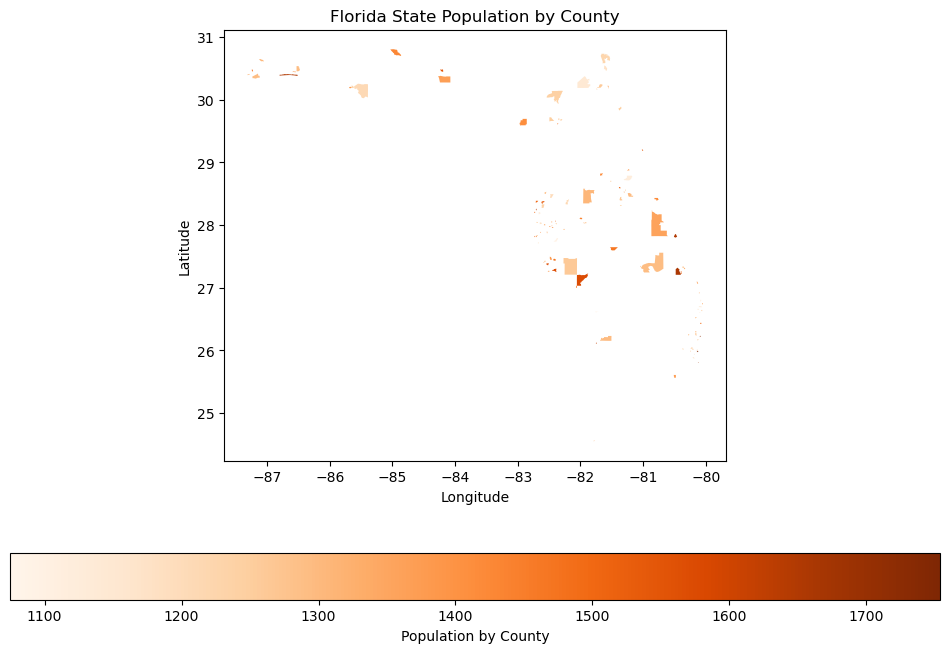

In [37]:
# Step 4: Plot the map, coloring by population volume
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the counties with a color scale based on the population column
merged.plot(column='population', ax=ax, legend=True,
            legend_kwds={'label': "Population by County",
                         'orientation': "horizontal"},
            cmap='Oranges')

# Add titles and labels
plt.title('Florida State Population by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

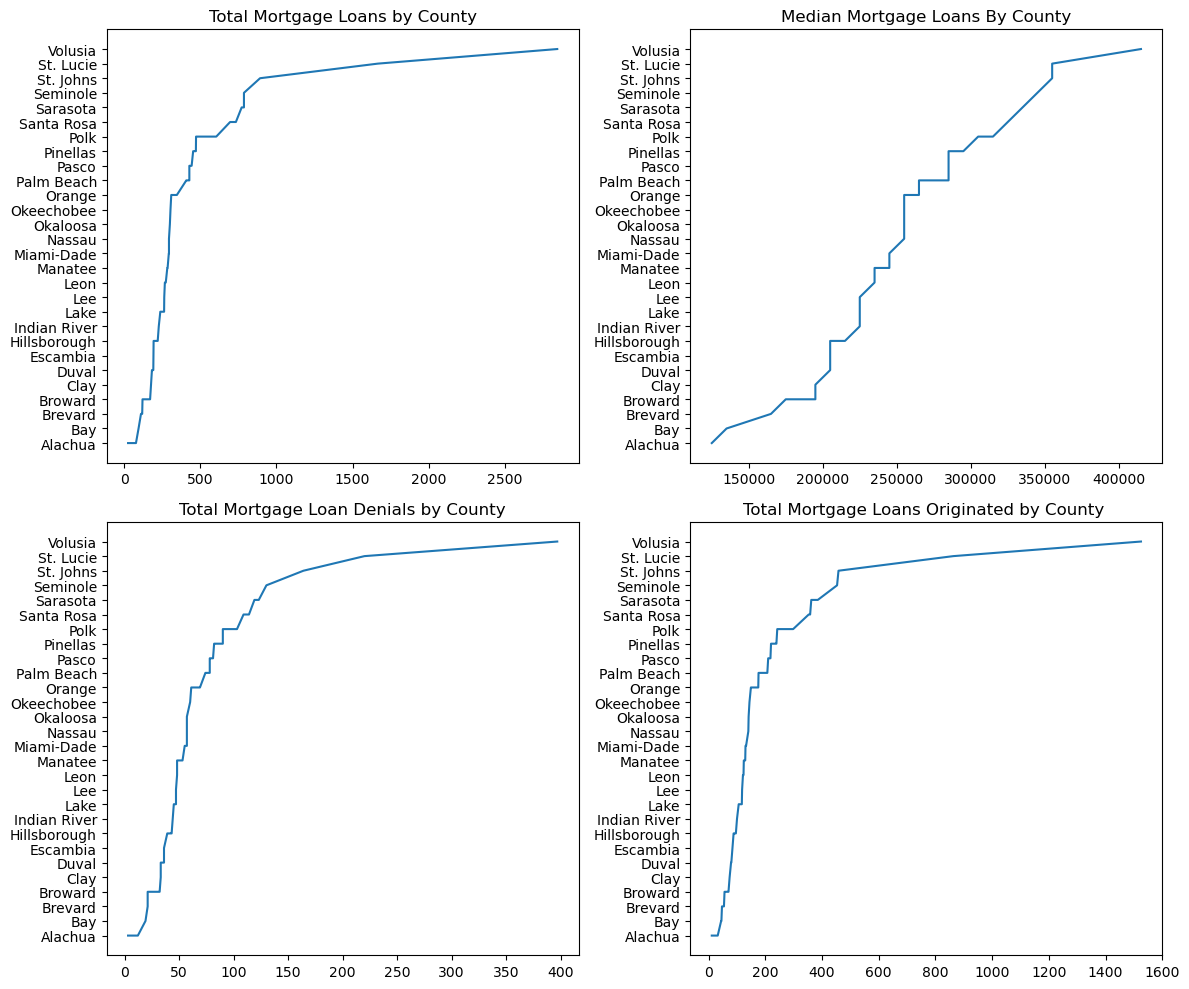

In [39]:
# This GRaph to explore the amount of loans given based on county
x = sorted(full_dataset['county'])
y1 = sorted(full_dataset['num_mortgage_loans'])
y2 = sorted(full_dataset['med_mortgage_loan'])
y3 = sorted(full_dataset['num_mortgage_denials'])
y4 = sorted(full_dataset['num_mortgages_origin'])
 
# draw and enlarge my plots 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(y1,x)
axs[0, 0].set_title('Total Mortgage Loans by County')

axs[0, 1].plot(y2, x)
axs[0, 1].set_title('Median Mortgage Loans By County')

axs[1, 0].plot(y3, x)
axs[1, 0].set_title('Total Mortgage Loan Denials by County')

axs[1, 1].plot(y4, x)
axs[1, 1].set_title('Total Mortgage Loans Originated by County ')

plt.tight_layout()
plt.show()

In [41]:
# get the unique values for all of the counties
unique_counties = sorted(full_dataset['county'].unique())

# Step 2: Create a mapping (dictionary) that assigns a unique number to each county
county_to_number = {county: index for index, county in enumerate(unique_counties)}

# Step 3: Map the 'county' column in your original dataset to the new unique number using the mapping
full_dataset['county_number'] = full_dataset['county'].map(county_to_number)

#### County Mapping table

| County Name  |  Number_assigned  |
| -----------  | ----------------- |
|  Alachua     |      0            |
|  Bay         |      1            |
|  Brevard     |      2            |
|  Broward     |      3            |
|  Clay        |      4            |
|  Duval       |      5            |
|  Escambia    |      6            |
| Hillsborough |      7            |
| Indian River |      8            |
|  Lake        |      9            |
|  Lee         |      10           |
|  Leon        |      11           |
|  Manatee     |      12           |
|  Miami-Dade  |      13           |
|  Nassau      |      14           |
|  Okaloosa    |      15           |
|  Okeechobee  |      16           |
|  Orange      |      17           |
|  Palm Beach  |      18           |
|  Pasco       |      19           |
|  Pinellas    |      20           |
|  Polk        |      21           |
|  Santa Rosa  |      22           |
|  Sarasota    |      23           |
|  Seminole    |      24           |
|  St. Johns   |      25           |
|  St. Lucie   |      26           |
|  Volusia     |      27           |

In [ ]:
# Check for occurrences of each county within the data
# for c in sorted(full_dataset['county'].unique()):
#    print(c)

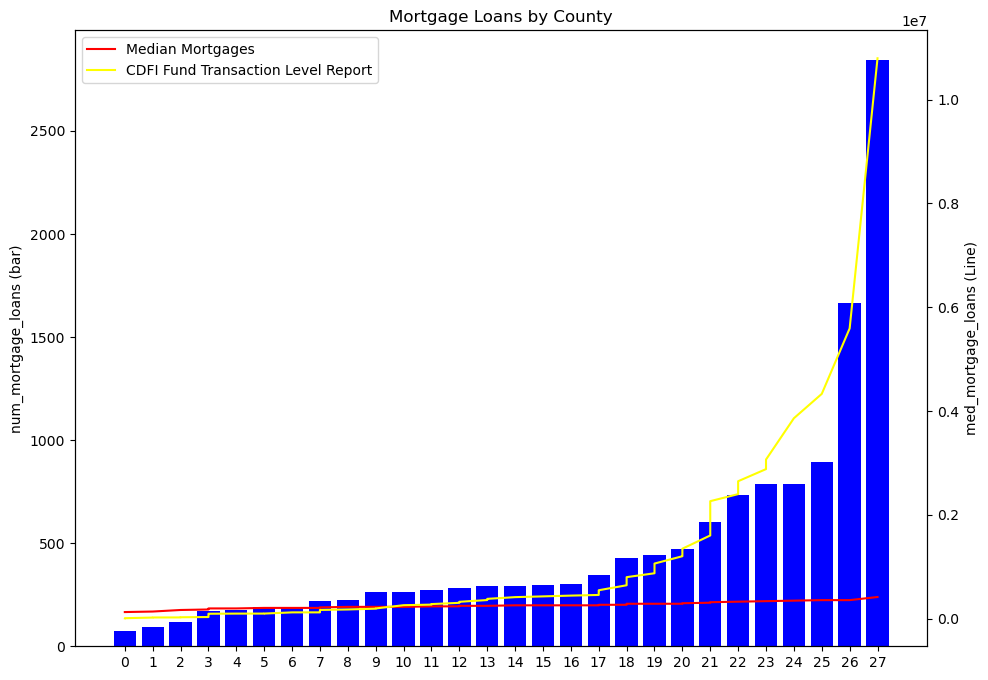

In [43]:
# Mapping the counties to a specific number instead of the words, mainly for readability of the graph
counties = Counter(sorted(full_dataset['county']))

# Convert words to their corresponding counts
county_encoded = [counties[c] for c in sorted(full_dataset['county'])]

x = sorted(full_dataset['county_number'])
y1 = sorted(full_dataset['num_mortgage_loans'])
y2 = sorted(full_dataset['med_mortgage_loan'])
y3 = sorted(full_dataset['total_cdfi_lending'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(11, 8))

# Plot the first dataset as a bar chart
ax1.bar(x, y1, color='blue', label='Number of Mortgages')
ax1.set_ylabel('num_mortgage_loans (bar)')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset as a line chart
ax2.plot(x, y2, color='red', label='Median Mortgages')
ax2.set_ylabel('med_mortgage_loans (Line)')

# Plot the second dataset as a line chart
ax2.plot(x, y3, color='yellow', label='CDFI Fund Transaction Level Report')
ax2.set_ylabel('med_mortgage_loans (Line)')

# Set the title and labels
plt.title('Mortgage Loans by County')
plt.xlabel('Counties Encoded')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])  # Custom tick positions per county number

# Show the legend
plt.legend()

# Display the plot
plt.show()

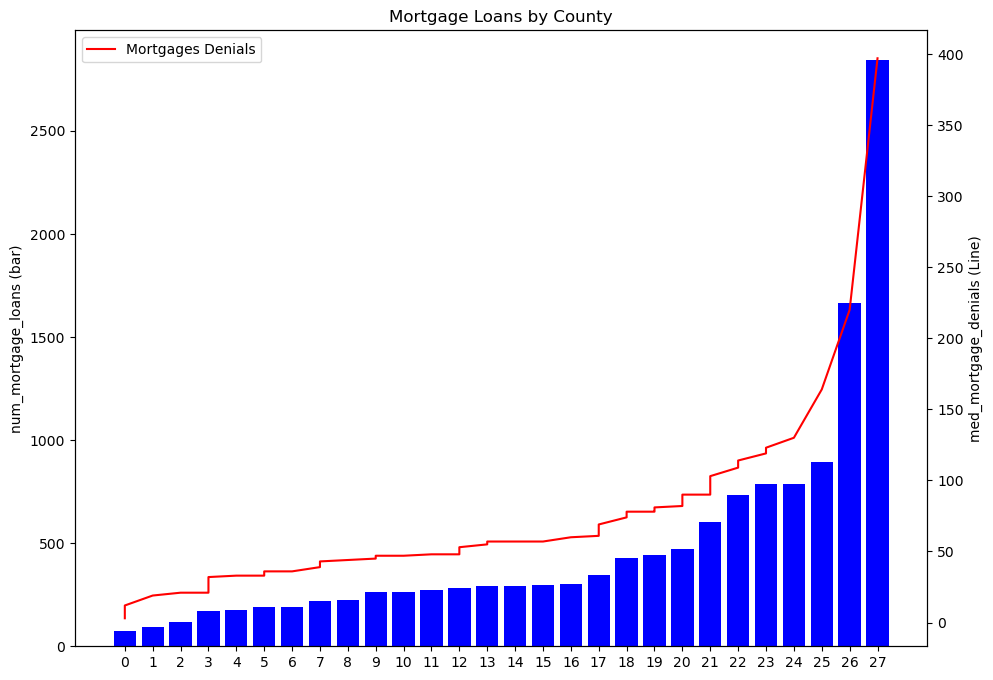

In [45]:
# Mapping the counties to a specific number instead of the words, mainly for readability of the graph
counties = Counter(sorted(full_dataset['county']))

# Convert words to their corresponding counts
county_encoded = [counties[c] for c in sorted(full_dataset['county'])]

x = sorted(full_dataset['county_number'])
y1 = sorted(full_dataset['num_mortgage_loans'])
y2 = sorted(full_dataset['num_mortgage_denials'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(11, 8))

# Plot the first dataset as a bar chart
ax1.bar(x, y1, color='blue', label='Number of Mortgages')
ax1.set_ylabel('num_mortgage_loans (bar)')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset as a line char
ax2.plot(x, y2, color='red', label='Mortgages Denials')
ax2.set_ylabel('med_mortgage_denials (Line)')

# Set the title and labels
plt.title('Mortgage Loans by County')
plt.xlabel('Counties Encoded')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])  # Custom tick positions per county number

# Show the legend
plt.legend()

# Display the plot
plt.show()

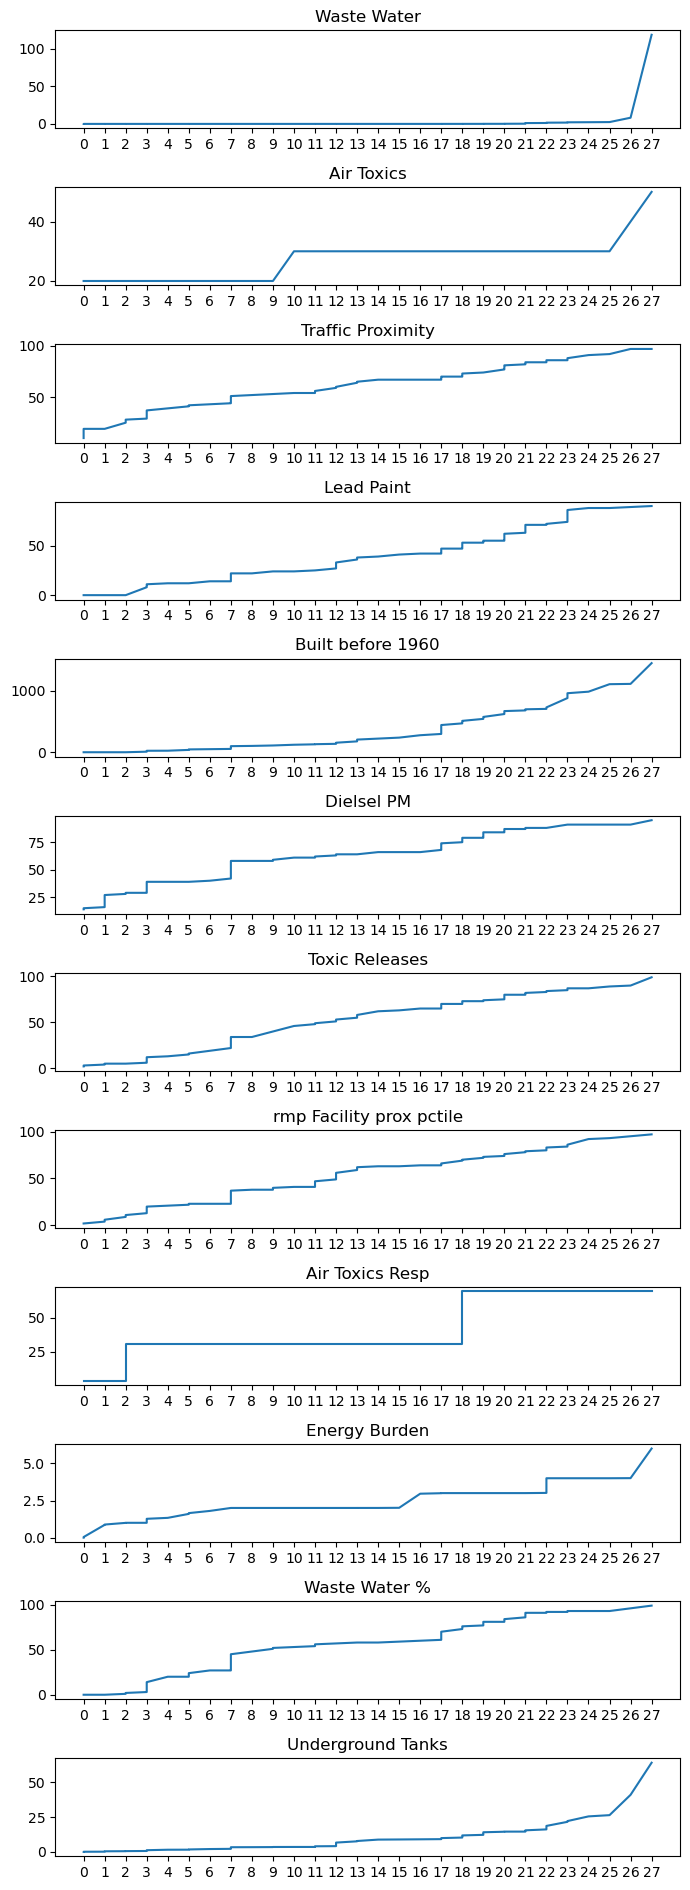

In [47]:
# Create some example data
x = sorted(full_dataset['county_number'])
y1 = sorted(full_dataset['wastewater']) 
y2 = sorted(full_dataset['air_toxics_cancer'])   
y3 = sorted(full_dataset['traffic_prox_pctile']) 
y4 = sorted(full_dataset['lead_paint_pctile'])
y5 = sorted(full_dataset['housing_before_1960'])
y6 = sorted(full_dataset['diesel_pm_pctile'])
y7 = sorted(full_dataset['toxic_releases_pctile'])
y8 = sorted(full_dataset['rmp_facility_prox_pctile'])
y9 = sorted(full_dataset['air_toxics_resp_pctile'])
y10 = sorted(full_dataset['energy_burden'])
y11 = sorted(full_dataset['wastewater_pctile'])
y12 = sorted(full_dataset['underground_tanks'])

# List of data for each plot
data = [
    (y1, 'Waste Water'),
    (y2, 'Air Toxics'),
    (y3, 'Traffic Proximity'),
    (y4, 'Lead Paint'),
    (y5, 'Built before 1960'),
    (y6, 'Dielsel PM'),
    (y7, 'Toxic Releases'),
    (y8, 'rmp Facility prox pctile'),
    (y9, 'Air Toxics Resp'),
    (y10, 'Energy Burden'),
    (y11, 'Waste Water %'),
    (y12, 'Underground Tanks')
]

# Create subplots: 12 rows, 1 column
fig, axs = plt.subplots(12, 1, figsize=(7, 19))

# Loop through each subplot and plot its corresponding data
for i, (y, title) in enumerate(data):
    axs[i].plot(x, y)  # Plot the data for this subplot
    axs[i].set_title(title)  # Set the title for this subplot
    axs[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]) 
   
# Adjust layout to prevent overlap of titles/labels
plt.tight_layout()


# Save the plot in a vector format (PDF or SVG)
plt.savefig('vertical_subplots_output.pdf', format='pdf')  # or 'svg'
plt.show()

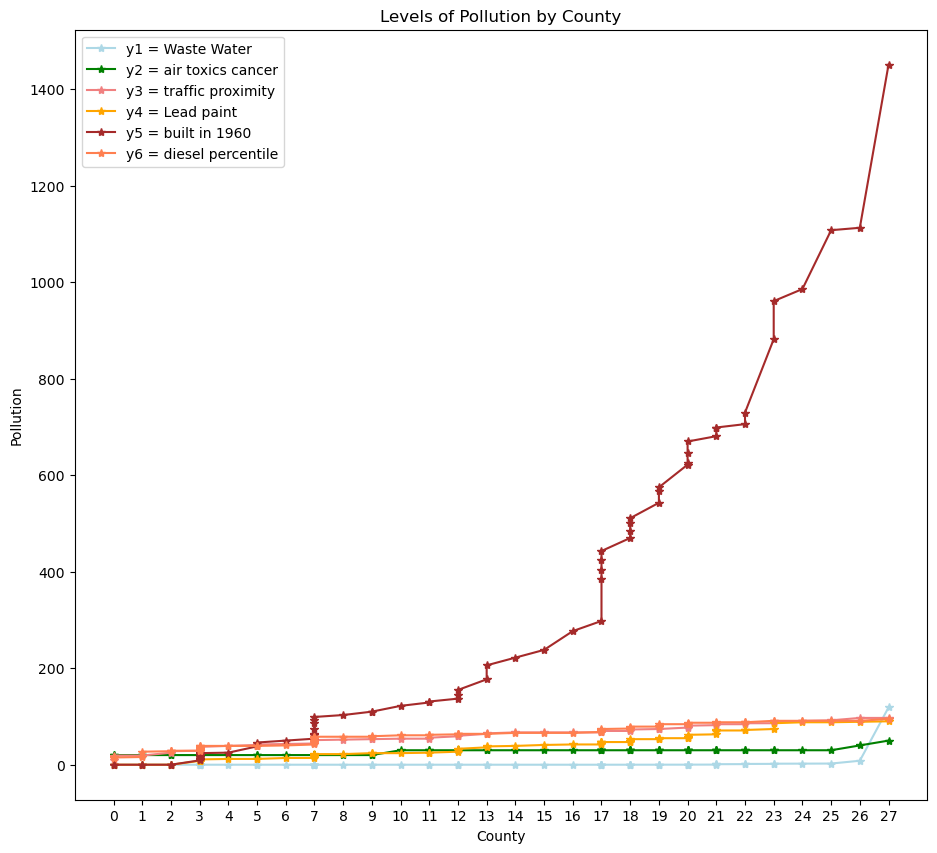

In [49]:
# Sample data
x = sorted(full_dataset['county_number'])
y1 = sorted(full_dataset['wastewater']) 
y2 = sorted(full_dataset['air_toxics_cancer'])   
y3 = sorted(full_dataset['traffic_prox_pctile']) 
y4 = sorted(full_dataset['lead_paint_pctile'])
y5 = sorted(full_dataset['housing_before_1960'])
y6 = sorted(full_dataset['diesel_pm_pctile'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(11, 10))

# Create a plot with multiple lines
plt.plot(x, y1, label='y1 = Waste Water', color='lightblue', marker='*')  # First line
plt.plot(x, y2, label='y2 = air toxics cancer', color='green', marker='*')   # Second line
plt.plot(x, y3, label='y3 = traffic proximity', color='lightcoral', marker='*')  # Third line
plt.plot(x, y4, label='y4 = Lead paint', color='orange', marker='*')  # 4th line
plt.plot(x, y5, label='y5 = built in 1960', color='brown', marker='*')  # 4th line
plt.plot(x, y6, label='y6 = diesel percentile', color='coral', marker='*')  # 4th line

# Add labels and title
plt.xlabel('County')
plt.ylabel('Pollution')
plt.title('Levels of Pollution by County')

# Add a legend to distinguish the lines
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])  # Custom tick positions per county number

# Show the plot
plt.show()

In [51]:
full_dataset['female'] = full_dataset['pop_pct_18_24_est'] + full_dataset['pop_pct_fem_18_24_est'] + full_dataset['pop_pct_fem_15_44_est'] + full_dataset['pop_pct_fem_16plus_est'] + full_dataset['pop_pct_fem_18plus_est'] + full_dataset['pop_pct_fem_21plus_est'] + full_dataset['pop_pct_fem_60plus_est'] + full_dataset['pop_pct_fem_62plus_est'] + full_dataset['pop_pct_fem_65plus_est'] + full_dataset['pop_pct_fem_75plus_est'] 
full_dataset['Female_moe'] = full_dataset['pop_pct_18_24_moe'] + full_dataset['pop_pct_fem_18_24_moe'] + full_dataset['pop_pct_fem_15_44_moe'] + full_dataset['pop_pct_fem_16plus_moe'] + full_dataset['pop_pct_fem_18plus_moe'] + full_dataset['pop_pct_fem_21plus_moe'] + full_dataset['pop_pct_fem_60plus_moe'] + full_dataset['pop_pct_fem_62plus_moe'] + full_dataset['pop_pct_fem_65plus_moe'] + full_dataset['pop_pct_fem_75plus_moe']  

full_dataset['male'] = full_dataset['pop_pct_15_44_est'] + full_dataset['pop_pct_male_18_24_est'] + full_dataset['pop_pct_male_15_44_est'] + full_dataset['pop_pct_16plus_est'] + full_dataset['pop_pct_male_16plus_est'] + full_dataset['pop_pct_18plus_est'] + full_dataset['pop_pct_male_18plus_est'] + full_dataset['pop_pct_21plus_est'] + full_dataset['pop_pct_60plus_est'] + full_dataset['pop_pct_male_60plus_est'] + full_dataset['pop_pct_62plus_est'] + full_dataset['pop_pct_male_62plus_est'] + full_dataset['pop_pct_65plus_est'] + full_dataset['pop_pct_male_65plus_est'] + full_dataset['pop_pct_75plus_est'] + full_dataset['pop_pct_male_75plus_est']
full_dataset['male_moe'] = full_dataset['pop_pct_15_44_moe'] + full_dataset['pop_pct_male_18_24_moe'] + full_dataset['pop_pct_male_15_44_moe'] + full_dataset['pop_pct_16plus_moe'] + full_dataset['pop_pct_male_16plus_moe'] + full_dataset['pop_pct_18plus_moe'] + full_dataset['pop_pct_21plus_moe'] + full_dataset['pop_pct_60plus_moe'] + full_dataset['pop_pct_male_60plus_moe'] + full_dataset['pop_pct_62plus_moe'] + full_dataset['pop_pct_male_62plus_moe'] + full_dataset['pop_pct_65plus_moe'] + full_dataset['pop_pct_male_65plus_moe'] + full_dataset['pop_pct_75plus_moe'] + full_dataset['pop_pct_male_75plus_moe'] 

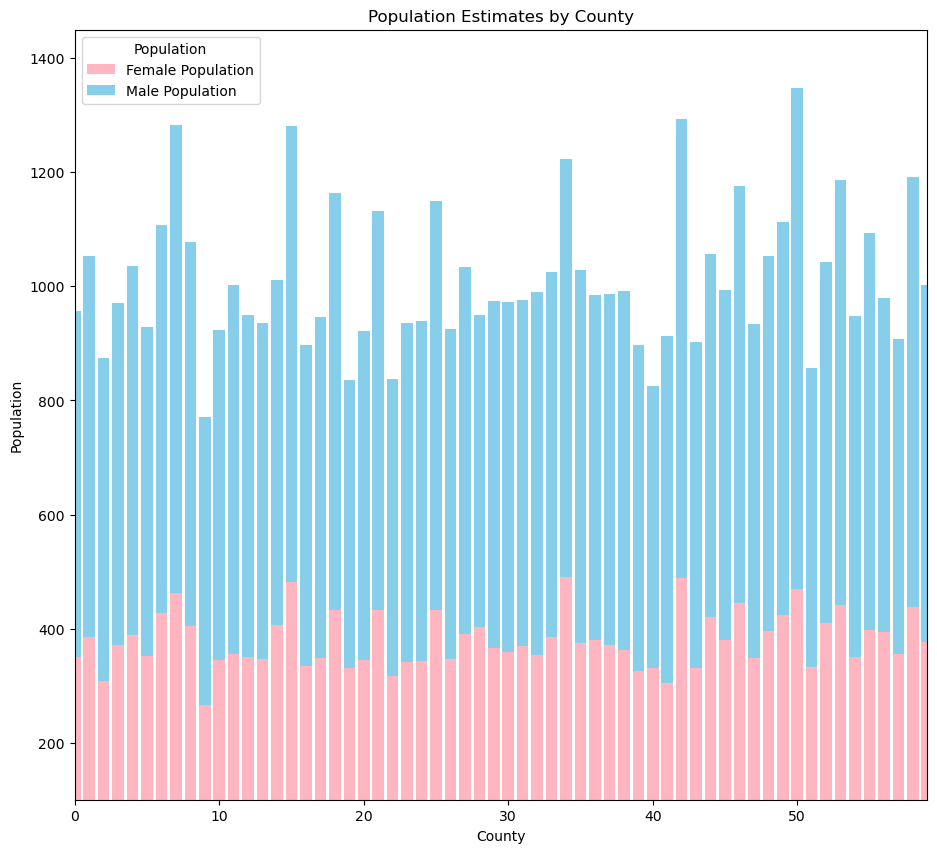

In [55]:
# Sample data
counties = sorted(full_dataset['county_number'])
gf = full_dataset['female']
gm = full_dataset['male']
#group3 = full_dataset['traffic_prox_pctile']

# Set the positions of the bars
xc = np.arange(len(counties))

fig, ax1 = plt.subplots(figsize=(11, 10))

# Create the stacked bar chart
plt.bar(xc, gf, label='Female Population', color='lightpink')
plt.bar(xc, gm, label='Male Population', color='skyblue', bottom=gf)  # Stack group 2 on top of group 1

# Add labels and title
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population Estimates by County')
plt.legend(title="Population")

# Adjust the x and y axis limits
plt.xlim(0, 59)   # Set the x-axis range
plt.ylim(100, 1450)  # Set the y-axis range

# Show the plot
plt.show()

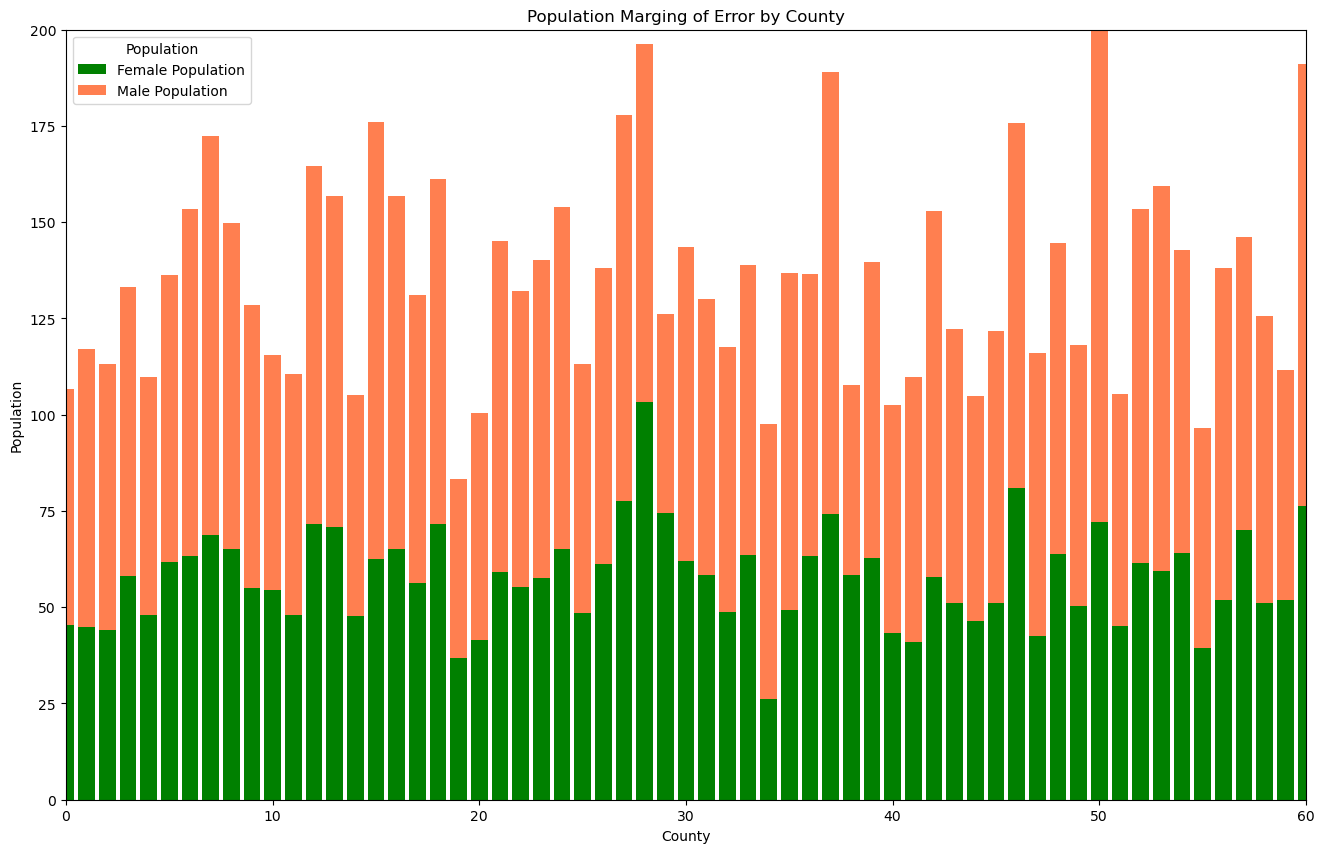

In [57]:
# Sample data
counties = sorted(full_dataset['county_number'])
gf_moe = full_dataset['Female_moe']
gm_moe = full_dataset['male_moe']
#group3 = full_dataset['traffic_prox_pctile']

# Set the positions of the bars
xc = np.arange(len(counties))

fig, ax1 = plt.subplots(figsize=(16, 10))

# Create the stacked bar chart
plt.bar(xc, gf_moe, label='Female Population', color='green')
plt.bar(xc, gm_moe, label='Male Population', color='coral', bottom=gf_moe)  # Stack group 2 on top of group 1

# Add labels and title
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population Marging of Error by County')
plt.legend(title="Population")

# Adjust the x and y axis limits
plt.xlim(0, 60)   # Set the x-axis range
plt.ylim(0, 200)  # Set the y-axis range

# Show the plot
plt.show()

### Only Housing Data by Demographics 

In [71]:
# capturing housing type divided by population demographics
housingtype = df[[ 'county', 'housecost_owner_est', 'housecost_rent_est',
                  'pop_pct_2plus_races','pop_pct_asian','pop_pct_white', 
                  'pop_pct_american_indian', 'pop_pct_other_race','pop_pct_native_hawaiian', 
                  'pop_pct_black' ]]
housingtype

,county,housecost_owner_est,housecost_rent_est,pop_pct_2plus_races,pop_pct_asian,pop_pct_white,pop_pct_american_indian,pop_pct_other_race,pop_pct_native_hawaiian,pop_pct_black
6,Alachua,432,1393,13.4,16.3,42.1,0.3,7.1,0.3,20.5
13,Alachua,1786,1660,7.8,11.3,71.6,0.1,1.4,0.1,7.7
19,Bay,1545,1513,10.6,3.3,74.5,0.3,1.8,0.3,9.3
73,Brevard,1569,1800,12.4,2.4,80.8,0.3,1.1,0.2,2.8
166,Broward,1225,1787,12.4,2.1,46.8,1.4,11.3,0.5,25.6
...,...,...,...,...,...,...,...,...,...,...
4925,Polk,1063,1342,3.0,7.0,62.4,1.1,13.9,0.3,12.2
4984,St. Lucie,1588,2144,16.2,3.5,53.0,0.7,4.1,0.4,22.2
4994,Santa Rosa,1152,1554,3.6,1.2,89.8,0.4,0.4,0.8,3.6
5012,Sarasota,524,1397,18.4,0.8,65.3,0.1,2.7,0.9,11.7


In [73]:
house_summary = housingtype.describe().T
house_summary

,count,mean,std,min,25%,50%,75%,max
housecost_owner_est,119.0,1269.537815,527.815048,289.0,906.00,1163.0,1585.00,3211.0
housecost_rent_est,119.0,1477.630252,397.294300,765.0,1228.50,1451.0,1638.50,3045.0
pop_pct_2plus_races,119.0,12.197479,7.425511,0.3,6.70,10.0,17.00,30.1
pop_pct_asian,119.0,2.707563,2.633975,0.1,0.80,2.1,3.75,16.3
pop_pct_white,119.0,63.558824,18.612372,10.3,52.70,65.1,78.00,94.7
pop_pct_american_indian,119.0,0.730252,0.908300,0.1,0.20,0.4,0.75,5.7
pop_pct_other_race,119.0,5.026050,5.700364,0.1,1.15,2.7,7.55,35.6
pop_pct_native_hawaiian,119.0,0.707563,1.019235,0.1,0.20,0.4,0.80,6.8
pop_pct_black,119.0,15.078992,14.312646,0.3,5.55,11.8,20.10,77.3


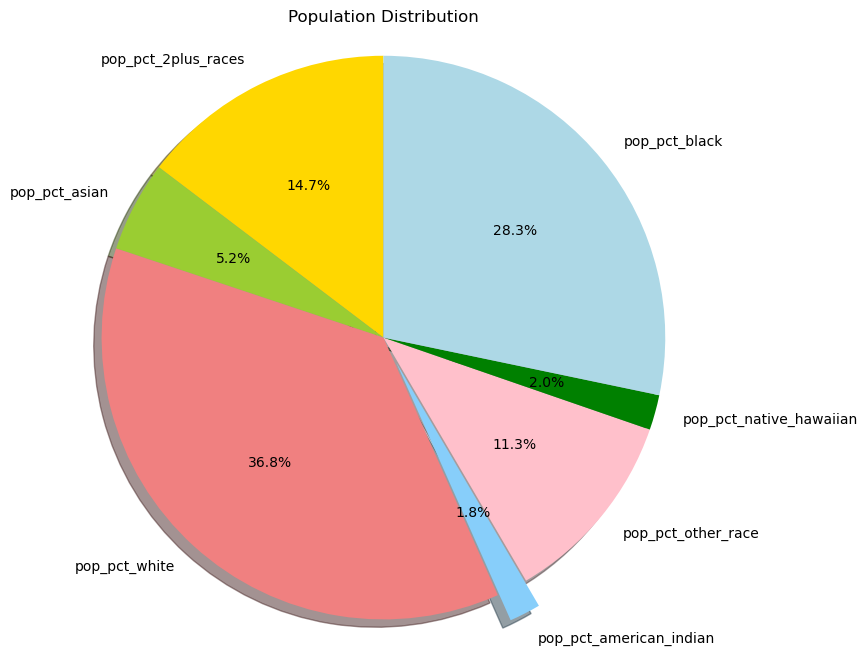

In [75]:
labels = ['pop_pct_2plus_races', 'pop_pct_asian', 'pop_pct_white', 'pop_pct_american_indian','pop_pct_other_race','pop_pct_native_hawaiian','pop_pct_black']
sizes = house_summary.iloc[2:]['std'].tolist()  # Sizes corresponding to each label
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','green','lightblue']  # Optional colors
explode = (0, 0, 0, 0.1, 0, 0, 0)  # Explode the 1st slice (i.e., 'Apples')

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: set figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie chart is a circle
plt.axis('equal')

# Add a title
plt.title('Population Distribution')

# Show the pie chart
plt.show()

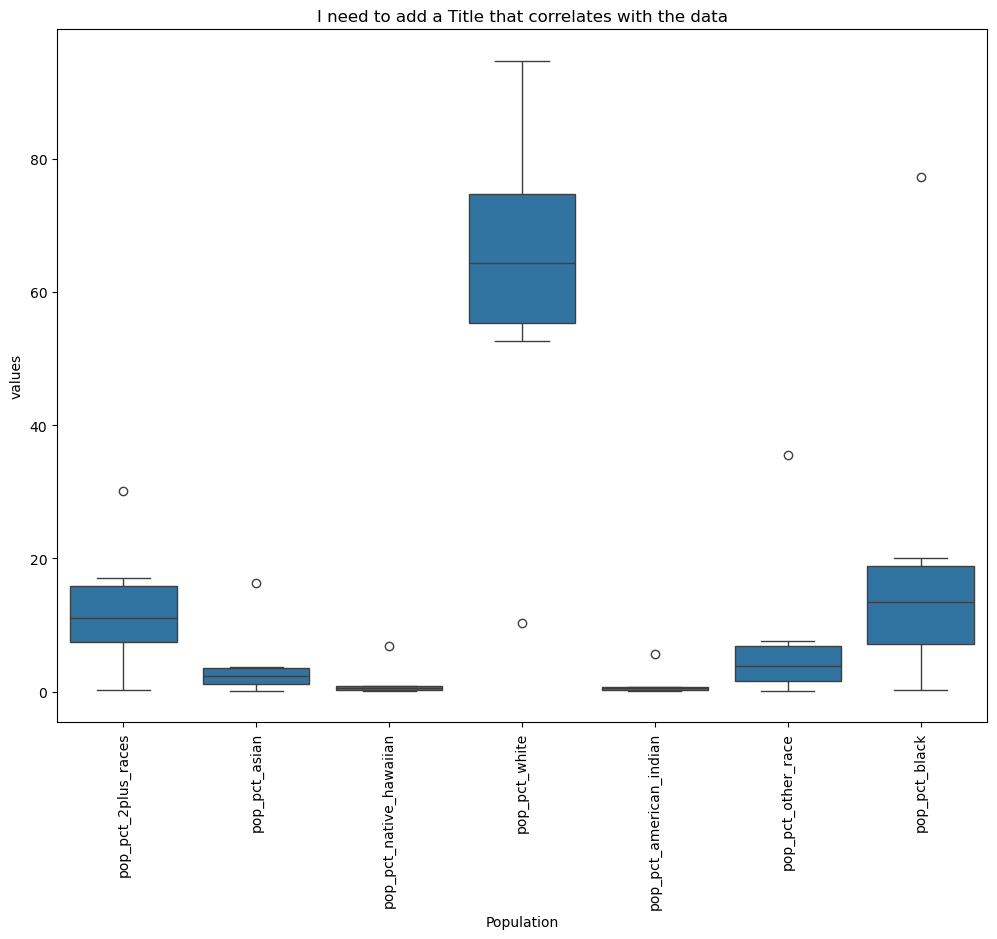

In [77]:
data = pd.DataFrame({
     'min': sorted(house_summary.iloc[2:]['min'].tolist()),
     '25%': sorted(house_summary.iloc[2:]['25%'].tolist()),
     'mean':sorted(house_summary.iloc[2:]['mean'].tolist()),
     '50%': sorted(house_summary.iloc[2:]['50%'].tolist()),
     '75%': sorted(house_summary.iloc[2:]['75%'].tolist()),
     'max': sorted(house_summary.iloc[2:]['max'].tolist())
     
    }, index=['pop_pct_2plus_races', 'pop_pct_asian', 'pop_pct_native_hawaiian',
          'pop_pct_white', 'pop_pct_american_indian', 'pop_pct_other_race', 'pop_pct_black'])


#Create a DataFrame for plotting
population = ['pop_pct_2plus_races', 'pop_pct_asian', 'pop_pct_native_hawaiian',
             'pop_pct_white', 'pop_pct_american_indian', 'pop_pct_other_race', 'pop_pct_black']

# Create a DataFrame with values
values = ['min', '25%', 'mean', '50%', '75%', 'max']
plot_data = pd.DataFrame(house_summary.loc[population][values].T)  

# Reset index for easier plotting
plot_data.reset_index(inplace=True)
#plot_data.melt(id_vars='index', var_name='Population', value_name='Value')
plot_data_melted = plot_data.melt(id_vars='index', var_name='Population', value_name='Value')

# Rename the index column for clarity
plot_data_melted.rename(columns={'index': 'Statistic'}, inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 9))
sns.boxplot(x='Population', y='Value', data=plot_data_melted)
plt.title('I need to add a Title that correlates with the data')
plt.xlabel('Population')
plt.ylabel('values')
plt.xticks(rotation=90)
plt.show()

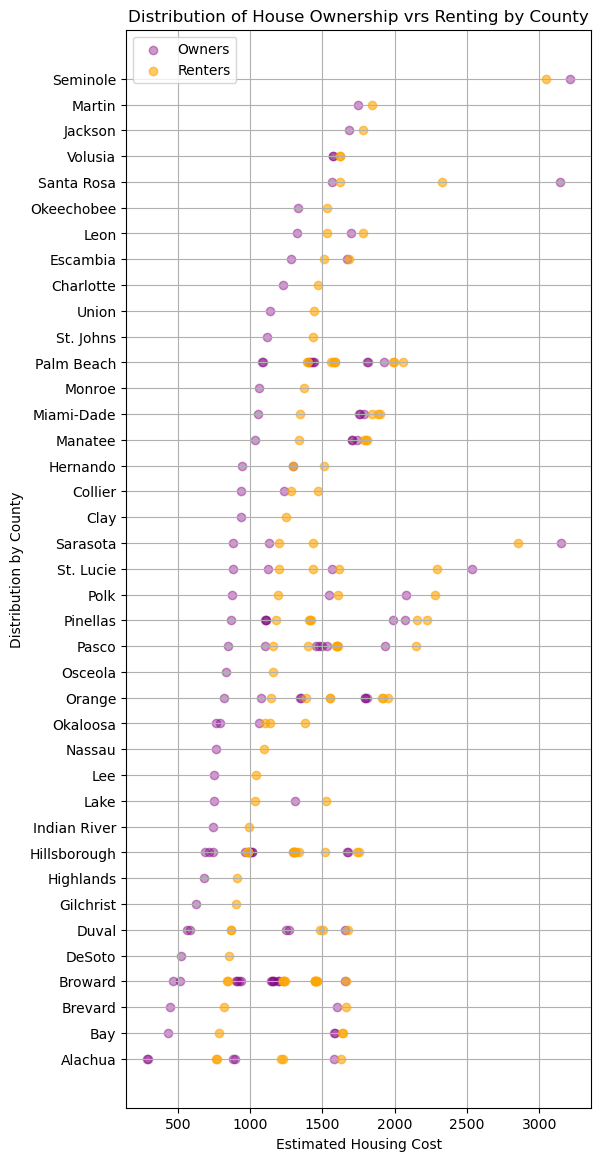

In [79]:
x  = sorted(housingtype['housecost_owner_est'])
x1 = sorted(housingtype['housecost_rent_est'])
y1 = sorted(housingtype['pop_pct_2plus_races'])
y2 = sorted(housingtype['pop_pct_black']) 
y3 = sorted(housingtype['pop_pct_white']) 

# Matplotlib example
plt.figure(figsize=(6, 14))
plt.scatter(x,housingtype['county'], marker='o', label='Owners', color='purple', alpha=0.4)
plt.scatter(x1,housingtype['county'], marker='o', label='Renters', color='orange', alpha=0.6)
plt.title('Distribution of House Ownership vrs Renting by County')

plt.xlabel('Estimated Housing Cost')
plt.ylabel('Distribution by County')
plt.grid(True)
plt.legend()
plt.show()

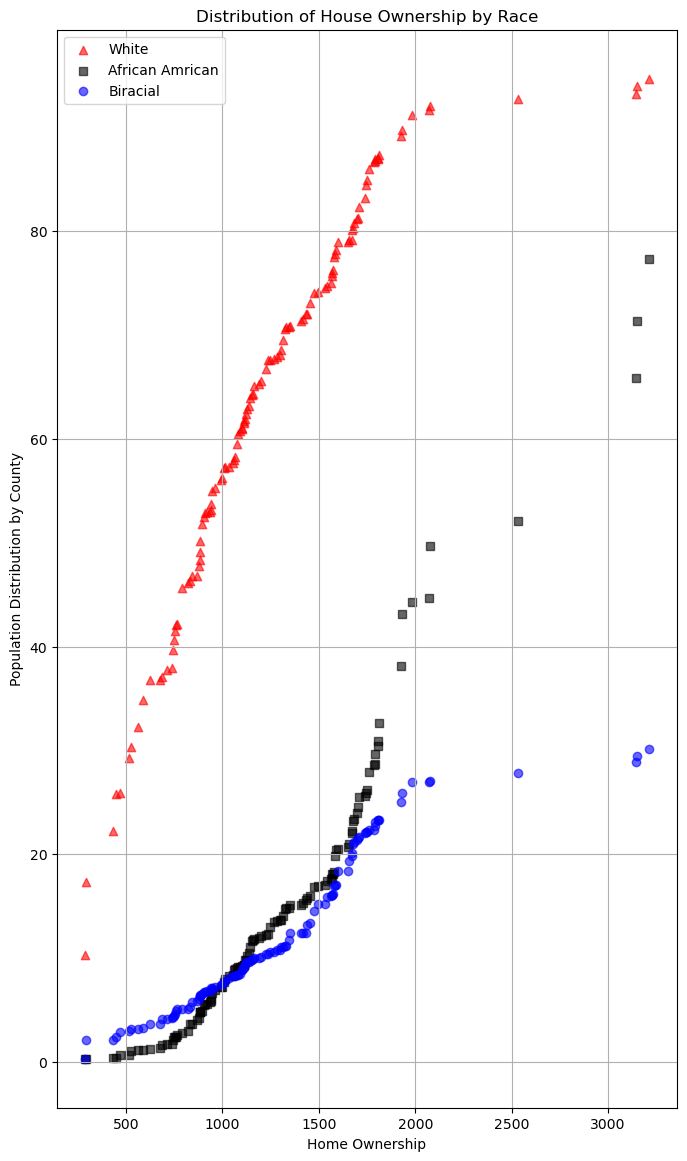

In [81]:
# Matplotlib example
plt.figure(figsize=(8, 14))
#plt.scatter(x,housingtype['county'], marker='o', label='Ownership by County', color='purple', alpha=0.6)
#plt.scatter(x, housingtype['county'], marker='*', color='white', alpha=0.6)
plt.scatter(x, y3, marker='^', label='White', color='red', alpha=0.6)
plt.scatter(x, y2, marker='s', label='African Amrican', color='black', alpha=0.6)
plt.scatter(x, y1, marker='o', label='Biracial', color='blue', alpha=0.6)
plt.title('Distribution of House Ownership by Race')
plt.xlabel('Home Ownership')
plt.ylabel('Population Distribution by County')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
df1[['county','total_cdfi_lending', 'med_mortgage_loan',
       'med_property_value', 'med_sba_504_loan', 'med_sba_7a_loan',
       'num_mortgage_loans', 'num_mortgage_denials', 'num_mortgages_origin',
       'num_sba_504_loans', 'num_sba_7a_loans', 'pop_pct_2plus_races',
       'pop_pct_white', 'pop_pct_black', 'pop_pct_american_indian',
       'pop_pct_asian', 'pop_pct_native_hawaiian', 'pop_pct_other_race']]

,county,total_cdfi_lending,med_mortgage_loan,med_property_value,med_sba_504_loan,med_sba_7a_loan,num_mortgage_loans,num_mortgage_denials,num_mortgages_origin,num_sba_504_loans,num_sba_7a_loans,pop_pct_2plus_races,pop_pct_white,pop_pct_black,pop_pct_american_indian,pop_pct_asian,pop_pct_native_hawaiian,pop_pct_other_race
1,Alachua,44290.000000,165000.0,225000.0,351500.0,915000.0,83.0,15.0,40.0,4.0,2.0,6.8,57.8,30.7,0.0,2.1,0.0,2.6
4,Alachua,47043.683979,305000.0,405000.0,149000.0,755000.0,159.0,13.0,85.0,3.0,3.0,9.5,79.2,5.2,0.0,4.2,0.0,1.8
5,Alachua,57203.000000,135000.0,195000.0,519000.0,490000.0,84.0,19.0,39.0,1.0,1.0,7.4,58.2,19.5,0.3,9.9,0.0,4.6
9,Alachua,61927.000000,205000.0,325000.0,714000.0,748000.0,336.0,56.0,172.0,4.0,2.0,8.3,72.9,16.4,0.1,1.2,0.0,1.1
10,Alachua,253192.500000,185000.0,315000.0,460000.0,350000.0,437.0,54.0,243.0,4.0,3.0,6.5,85.0,7.6,0.2,0.0,0.0,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,Pinellas,676538.000000,245000.0,365000.0,409000.0,346000.0,260.0,45.0,121.0,15.0,11.0,7.2,74.4,6.4,0.0,9.0,0.0,3.0
5155,Sarasota,107137.000000,165000.0,235000.0,486000.0,198000.0,136.0,46.0,35.0,2.0,1.0,8.9,6.7,82.9,0.0,0.0,0.0,1.5
5156,Sarasota,485103.000000,255000.0,445000.0,1120500.0,90000.0,219.0,47.0,97.0,2.0,10.0,12.4,81.3,3.3,0.0,0.9,0.0,2.0
5157,Seminole,98084.000000,315000.0,495000.0,647500.0,420000.0,232.0,30.0,115.0,2.0,5.0,14.1,67.9,7.8,0.0,7.3,0.0,2.9


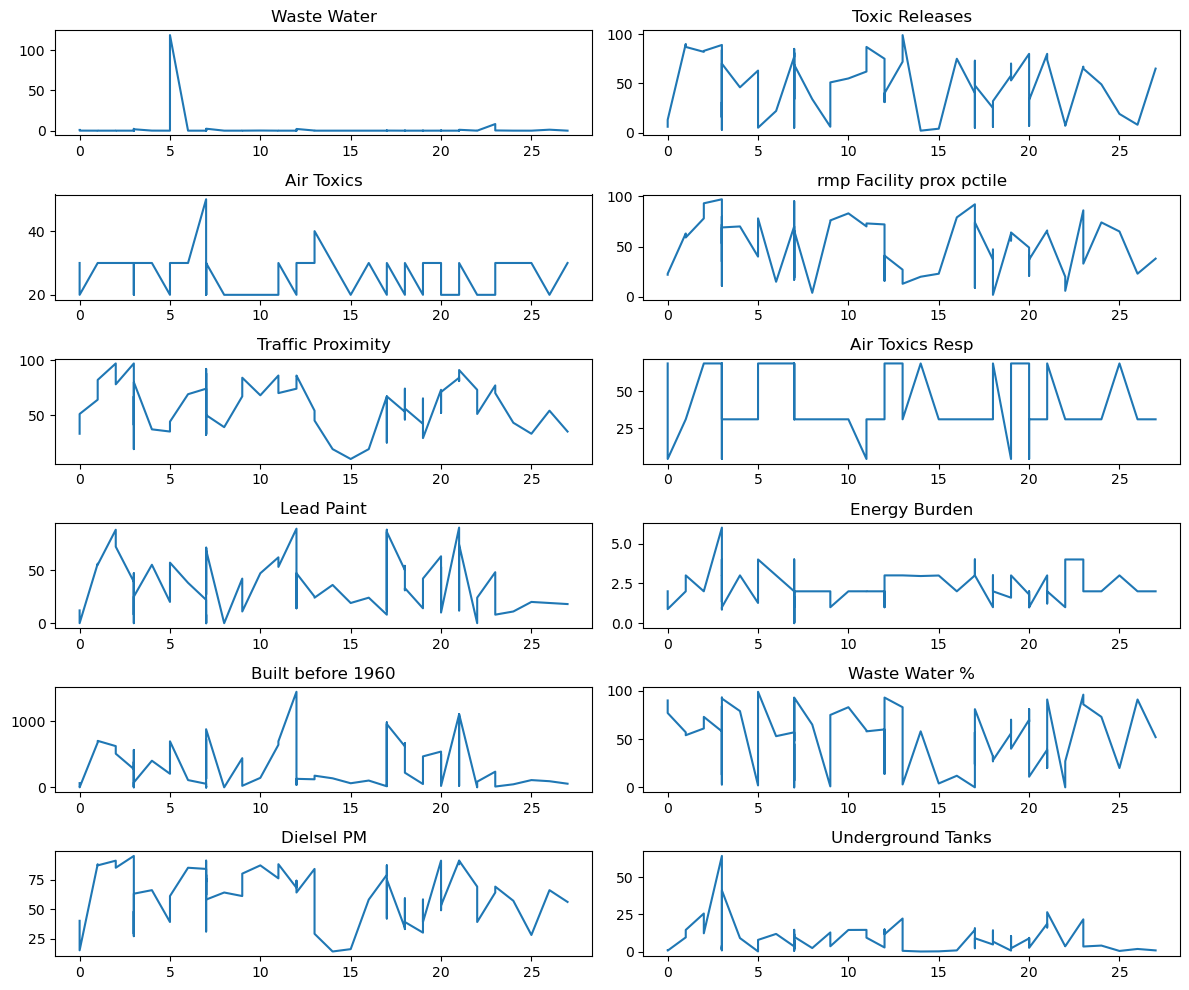

In [87]:
# This GRaph to explore the different contminants in the counties in an unsorted way 
x = sorted(full_dataset['county_number'])
y1 = full_dataset['wastewater'] 
y2 = full_dataset['air_toxics_cancer']   
y3 = full_dataset['traffic_prox_pctile'] 
y4 = full_dataset['lead_paint_pctile']
y5 = full_dataset['housing_before_1960']
y6 = full_dataset['diesel_pm_pctile']
y7 = full_dataset['toxic_releases_pctile']
y8 = full_dataset['rmp_facility_prox_pctile']
y9 = full_dataset['air_toxics_resp_pctile']
y10 = full_dataset['energy_burden']
y11 = full_dataset['wastewater_pctile']
y12 = full_dataset['underground_tanks']

# 6x2 plots on the pollution factors 
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 10))

# First column (row 0 to row 5)
axs[0, 0].plot(x,y1)
axs[0, 0].set_title('Waste Water')

axs[1, 0].plot(x,y2)
axs[1, 0].set_title('Air Toxics')

axs[2, 0].plot(x,y3)
axs[2, 0].set_title('Traffic Proximity')

axs[3, 0].plot(x,y4)
axs[3, 0].set_title('Lead Paint')

axs[4, 0].plot(x,y5)
axs[4, 0].set_title('Built before 1960')

axs[5, 0].plot(x,y6)
axs[5, 0].set_title('Dielsel PM')

# Second column (row 0 to row 5)
axs[0, 1].plot(x,y7)
axs[0, 1].set_title('Toxic Releases')

axs[1, 1].plot(x,y8)
axs[1, 1].set_title('rmp Facility prox pctile')

axs[2, 1].plot(x,y9)
axs[2, 1].set_title('Air Toxics Resp')

axs[3, 1].plot(x,y10)
axs[3, 1].set_title('Energy Burden')

axs[4, 1].plot(x,y11)
axs[4, 1].set_title('Waste Water %')

axs[5, 1].plot(x,y12)
axs[5, 1].set_title('Underground Tanks')

# Adjust layout for better spacing between plots
plt.tight_layout()
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

# Show the plot
plt.show()